<a href="https://colab.research.google.com/github/nimratmann/sqlite_database_operations/blob/main/sql_db_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import re

# Hospital 1: Stony Brook Hospital

In [130]:
sb = pd.read_csv('https://raw.githubusercontent.com/nimratmann/sqlite_database_operations/main/Dataset/113243405_StonyBrookUniversityHospital_standardcharges.csv')
sb

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration and Analysis

In [131]:
print("Stony Brook Hospital Standard Charges Overview: ")
print(sb.head())

Stony Brook Hospital Standard Charges Overview: 
    Code                                        Description        Type  \
0  10004  FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...  Outpatient   
1  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
2  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
3  10006  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
4  10009  FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...  Outpatient   

  Package/Line_Level  Gross charge  Discounted cash price  \
0               Line        718.67                 718.67   
1               Line       2061.25                2061.25   
2            Package       2061.25                2061.25   
3               Line        728.54                 728.54   
4               Line       2823.01                2823.01   

   De-identified min contracted rate  De-identified max contracted rate  \
0                            2155.50                      

In [132]:
print("Summary Statistics for Stony Brook Hospital Standard Charges: ")
print(sb.describe())

Summary Statistics for Stony Brook Hospital Standard Charges: 
       Gross charge  Discounted cash price  De-identified min contracted rate  \
count  7.710000e+03           7.710000e+03                        6254.000000   
mean   2.274832e+04           2.274832e+04                        4090.693876   
std    7.470570e+04           7.470570e+04                       10576.213503   
min    3.000000e-02           3.000000e-02                           0.010000   
25%    1.065895e+03           1.065895e+03                          96.520000   
50%    4.745295e+03           4.745295e+03                        1108.860000   
75%    1.103881e+04           1.103881e+04                        4309.532500   
max    1.857952e+06           1.857952e+06                      327869.690000   

       De-identified max contracted rate  Derived contracted rate  \
count                       6.254000e+03              6254.000000   
mean                        1.003579e+04              6315.587725   


## Cleaning Data and Handling the Missing Values

In [133]:
def clean_column_names(sb):
    # Create a dictionary to map old column names to cleaned names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()
    column_mapping = {col: clean_name(col) for col in sb.columns}

    # Use the rename method to rename columns
    sb = sb.rename(columns=column_mapping)

    return sb

# Apply the clean_column_names function to the DataFrame
sb = clean_column_names(sb)
sb

,code,description,type,packagelinelevel,grosscharge,discountedcashprice,deidentifiedmincontractedrate,deidentifiedmaxcontractedrate,derivedcontractedrate,1199commercialother,...,optumcommercialother,oxfordcommercialother,oxfordcommercialhmopos,tricarecommercialother,unitedhealthcarecommercialother,unitedhealthcaremedicareadvantagehmo,unitedhealthcarecommercialhmopos,unitedhealthcaremedicaidhmo,unitedhealthcarecommercialppoopenaccess,veteranfamilycommercialother
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
print("Missing Values in Stony Brook Hospital Charges Dataset: ")
print(sb.isnull().sum())

Missing Values in Stony Brook Hospital Charges Dataset: 
code                                          0
description                                   0
type                                        783
packagelinelevel                            783
grosscharge                                   0
discountedcashprice                           0
deidentifiedmincontractedrate              1456
deidentifiedmaxcontractedrate              1456
derivedcontractedrate                      1456
1199commercialother                        6696
aetnamedicareadvantagehmo                  6604
aetnacommercialhmopos                      5883
aetnacommercialppoopenaccess               6098
aetnacommercialother                       7582
empirehealthcommercialother                4650
empirehealthcommercialppoopenaccess        5308
bluecrossblueshieldcommercialother         6456
beaconhealthcommercialother                7707
carelonhealthcommercialother               7707
cignacommercialppoopenaccess   

## Basic Statistics

In [135]:
print("Frequency Counts for the 'description column' in Stony Brook Hospital Charges dataset: ")
print(sb['description'].value_counts())

Frequency Counts for the 'description column' in Stony Brook Hospital Charges dataset: 
R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPL

In [137]:
# Descriptive Statitics for the Numerical Columns
numerical_columns = [
     "discountedcashprice",
    "grosscharge",
    "deidentifiedmincontractedrate",
    "deidentifiedmaxcontractedrate",
    "derivedcontractedrate",
    "1199commercialother",
    "aetnamedicareadvantagehmo",
    "aetnacommercialhmopos",
    "aetnacommercialppoopenaccess",
    "aetnacommercialother",
    "empirehealthcommercialother",
    "empirehealthcommercialppoopenaccess",
    "bluecrossblueshieldcommercialother",
    "beaconhealthcommercialother",
    "carelonhealthcommercialother",
    "cignacommercialppoopenaccess",
    "cignacommercialother",
    "cignacommercialhmopos",
    "ehfacetcommercialother",
    "emblemhealthcommercialppoopenaccess",
    "emblemhealthcommercialother",
    "emblemhealthcommercialhmopos",
    "emblemhealthmedicaidhmo",
    "emblemhealthmedicareadvantagehmo",
    "empirehealthcommercialhmopos",
     "empirehealthmedicareadvantagehmo",
    "empirehealthmedicaidhmo",
    "evernorthcommercialother",
    "fideliscommercialother",
    "fidelismedicareadvantagehmo",
    "fidelismedicaidhmo",
    "ghicommercialother",
    "healthfirstcommercialother",
    "healthfirstmedicareadvantagehmo",
    "healthfirstmedicaidhmo",
    "healthplushpmedicaidhmo",
    "healthplushpcommercialother",
    "healthplushpmedicareadvantagehmo",
    "humanacommercialother",
    "humanacommercialhmopos",
    "humanacommercialppoopenaccess",
    "meritainhealthcommercialother",
    "molinacommercialother",
    "optumcommercialother",
    "oxfordcommercialother",
    "oxfordcommercialhmopos",
    "tricarecommercialother",
    "unitedhealthcarecommercialother",
    "unitedhealthcaremedicareadvantagehmo",
    "unitedhealthcarecommercialhmopos",
    "unitedhealthcaremedicaidhmo",
    "unitedhealthcarecommercialppoopenaccess",
    "veteranfamilycommercialother",
]

analysis_results = {}
for column in numerical_columns:
    mean = sb[column].mean()
    median = sb[column].median()
    mode = sb[column].mode()
    std_dev = sb[column].std()
    min_value = sb[column].min()
    max_value = sb[column].max()

    # Calculate frequency counts distribution
    frequency_distribution = sb[column].value_counts().reset_index()
    frequency_distribution.columns = [column, "Frequency"]

    analysis_results[column] = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Standard Deviation": std_dev,
        "Min Value": min_value,
        "Max Value": max_value,
        "Frequency Distribution": frequency_distribution
    }

# Display the analysis results
for column, results in analysis_results.items():
    print(f"Analysis for column: {column}")
    print(results)
    print("\n")


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Analysis for column: discountedcashprice
{'Mean': 22748.319448767834, 'Median': 4745.295, 'Mode': 0    8165.0
Name: discountedcashprice, dtype: float64, 'Standard Deviation': 74705.70326611007, 'Min Value': 0.03, 'Max Value': 1857952.44, 'Frequency Distribution':       discountedcashprice  Frequency
0                 8165.00        268
1                12090.00         70
2                13590.00         63
3                 8965.00         47
4                  513.00         13
...                   ...        ...
5866              6453.95          1
5867              3727.11          1
5868              2284.63          1
5869             18455.69          1
5870              4580.00          1

[5871 rows x 2 columns]}


Analysis for column: grosscharge
{'Mean': 22748.319448767834, 'Median': 4745.295, 'Mode': 0    8165.0
Name: grosscharge, dtype: float64, 'Standard Deviation': 74705.70326611007, 'Min Value': 0.03, 'Max Value': 1857952.44, 'Frequency Distribution':       grosscharg

In [138]:
sb_mean = sb['discountedcashprice'].mean()
sb_median = sb['discountedcashprice'].median()
sb_mode = sb['discountedcashprice'].mode().values[0]


sb_range = sb['discountedcashprice'].max() - sb['discountedcashprice'].min()
sb_var = sb['discountedcashprice'].var()
sb_std= sb['discountedcashprice'].std()
sb_iqr = sb['discountedcashprice'].quantile(0.75) - sb['discountedcashprice'].quantile(0.25)


print("Measures of Central Tendency:")
print(f"Mean: {sb_mean}")
print(f"Median: {sb_median}")
print(f"Mode: {sb_mode}")
print("\nMeasures of Spread:")
print(f"Range: {sb_range}")
print(f"Variance: {sb_var}")
print(f"Standard Deviation: {sb_std}")
print(f"IQR (Interquartile Range): {sb_iqr}")


Measures of Central Tendency:
Mean: 22748.319448767834
Median: 4745.295
Mode: 8165.0

Measures of Spread:
Range: 1857952.41
Variance: 5580942100.484088
Standard Deviation: 74705.70326611007
IQR (Interquartile Range): 9972.9175


In [139]:
print (sb['description'].value_counts())
print (sb['type'].value_counts())
print (sb['code'].value_counts())
print (sb['packagelinelevel'].value_counts())

R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                                      1
SEMI-PRIVATE                            

## Data Distribution

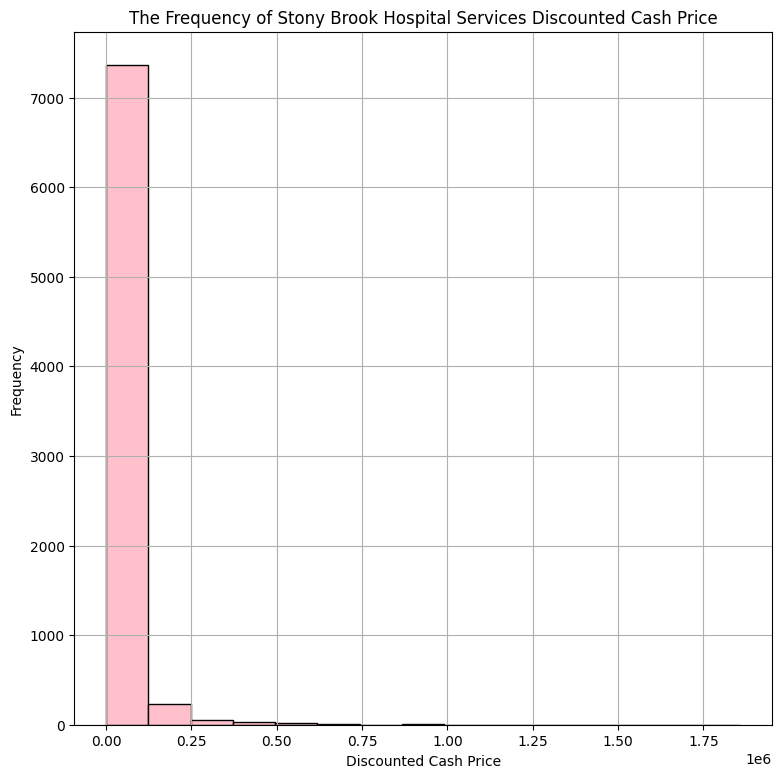

In [140]:
plt.figure(figsize=(9,9))
plt.hist(sb['discountedcashprice'], bins=15, color='pink', edgecolor='black')
plt.title('The Frequency of Stony Brook Hospital Services Discounted Cash Price')
plt.xlabel('Discounted Cash Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

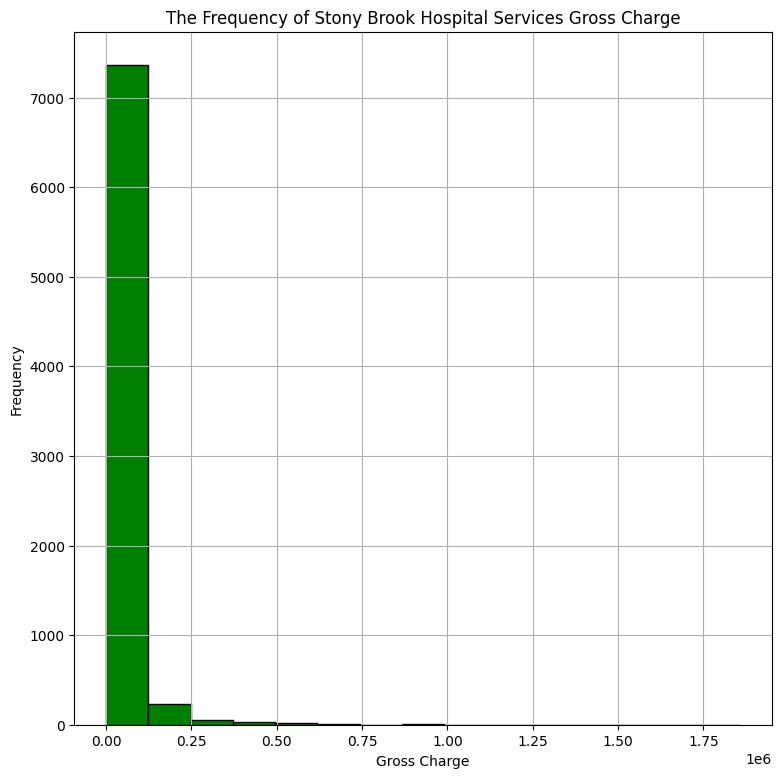

In [141]:
plt.figure(figsize=(9,9))
plt.hist(sb['grosscharge'], bins=15, color='green', edgecolor='black')
plt.title('The Frequency of Stony Brook Hospital Services Gross Charge')
plt.xlabel('Gross Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Hospital 2: NewYork-Presbyterian



In [142]:
nyp = pd.read_json('NewYorkPresbyterianHospital_standardcharges.zip')
nyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


## Data Exploration and Analysis

In [143]:
print("NewYork-Presbyterian Hospital Standard Charges Overview: ")
print(nyp.head())

NewYork-Presbyterian Hospital Standard Charges Overview: 
  Code (CPT/DRG)                                        Description Rev Code  \
0          96360        HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR     0260   
1          96361            HC IV INFUSION HYDRATION FLUIDS ADDL HR     0260   
2          96365  HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...     0260   
3          96367  HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...     0260   
4          96368      HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT     0260   

   Inpatient/Outpatient  Gross Charges  Discounted Cash Price     Aetna  \
0  Inpatient/Outpatient          866.0                  866.0   641.706   
1  Inpatient/Outpatient          358.0                  358.0   265.278   
2  Inpatient/Outpatient         1397.0                 1397.0  1035.177   
3  Inpatient/Outpatient          480.0                  480.0    355.68   
4  Inpatient/Outpatient          480.0                  480.0    355.68   

     Cigna

In [144]:
print("Summary Statistics for NewYork-Presbyterian Hospital Standard Charges: ")
print(nyp.describe())

Summary Statistics for NewYork-Presbyterian Hospital Standard Charges: 
       Gross Charges  Discounted Cash Price  Minimum Negotiated Charge  \
count   6.193000e+03           6.193000e+03                5912.000000   
mean    3.385988e+04           3.385988e+04                2249.918880   
std     1.062409e+05           1.062409e+05                6015.717204   
min     1.000000e+00           1.000000e+00                   0.454400   
25%     5.970000e+02           5.970000e+02                 122.228437   
50%     3.925000e+03           3.925000e+03                 431.142905   
75%     3.033600e+04           3.033600e+04                2107.000000   
max     2.538980e+06           2.538980e+06              204861.126000   

       Maximum Negotiated Charge  
count               5.912000e+03  
mean                2.390277e+04  
std                 7.136503e+04  
min                 1.608000e+00  
25%                 6.380010e+02  
50%                 4.086731e+03  
75%             

## Cleaning Data and Handling the Missing Values

In [145]:
def clean_column_names(nyp):
    # Create a dictionary to map old column names to cleaned names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()
    column_mapping = {col: clean_name(col) for col in nyp.columns}

    # Use the rename method to rename columns
    nyp = nyp.rename(columns=column_mapping)

    return nyp

# Apply the clean_column_names function to the DataFrame
nyp = clean_column_names(nyp)
nyp

,codecptdrg,description,revcode,inpatientoutpatient,grosscharges,discountedcashprice,aetna,cigna,empirebluecrossblueshield,emblemhealth,...,consumerhealthnetwork,devon,equian,firsthealth,magnacare,multiplanbeechstreetphcs,qhm,worldwide,minimumnegotiatedcharge,maximumnegotiatedcharge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [146]:
print("Missing Values in NewYork-Presbyterian Hospital Charges Dataset: ")
print(nyp.isnull().sum())

Missing Values in NewYork-Presbyterian Hospital Charges Dataset: 
codecptdrg                          0
description                         0
revcode                             0
inpatientoutpatient                 0
grosscharges                        0
discountedcashprice                 0
aetna                               0
cigna                               0
empirebluecrossblueshield           0
emblemhealth                        0
unitedhealthgroup                   0
aetnamedicare                       0
agewellmedicare                     0
emblemmedicare                      0
empiremedicare                      0
fidelismedicare                     0
healthfirstmedicare                 0
uhccommunityplanunitedmedicare      0
vnsmedicare                         0
wellcaremedicare                    0
1199                                0
affinitymolinaessential             0
affinitymolinamedicaidchp           0
amidacaremedicaid                   0
emblemmedicaidchp     

## Basic Statistics

In [147]:
print("Frequency Counts for the 'description column' in NewYork-Presbyterian Hospital Charges dataset: ")
print(nyp['description'].value_counts())

Frequency Counts for the 'description column' in NewYork-Presbyterian Hospital Charges dataset: 
KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVISION OF FOOT BONES                                                            1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS 

In [150]:
# Descriptive Statitics for the Numerical Columns
numerical_columns = [
    'grosscharges',
    'discountedcashprice',
    'minimumnegotiatedcharge',
    'maximumnegotiatedcharge',

]

analysis_results = {}
for column in numerical_columns:
    mean = nyp[column].mean()
    median = nyp[column].median()
    mode = nyp[column].mode().tolist()  # Convert mode to a list
    std_dev = nyp[column].std()
    min_value = nyp[column].min()
    max_value = nyp[column].max()

    # Calculate frequency counts distribution
    frequency_distribution = nyp[column].value_counts().reset_index()
    frequency_distribution.columns = [column, "Frequency"]

    analysis_results[column] = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Standard Deviation": std_dev,
        "Min Value": min_value,
        "Max Value": max_value,
        "Frequency Distribution": frequency_distribution
    }

# Display the analysis results
for column, results in analysis_results.items():
    print(f"Analysis for column: {column}")
    print(results)
    print("\n")


Analysis for column: grosscharges
{'Mean': 33859.88120020423, 'Median': 3925.0, 'Mode': [122.0], 'Standard Deviation': 106240.93386781713, 'Min Value': 1.0, 'Max Value': 2538979.617631959, 'Frequency Distribution':       grosscharges  Frequency
0       122.000000         32
1      3337.000000         29
2      2553.000000         27
3       618.000000         26
4       116.000000         23
...            ...        ...
4096  47682.000000          1
4097  26559.000000          1
4098  39648.000000          1
4099  49748.000000          1
4100  77081.639496          1

[4101 rows x 2 columns]}


Analysis for column: discountedcashprice
{'Mean': 33859.88120020423, 'Median': 3925.0, 'Mode': [122.0], 'Standard Deviation': 106240.93386781713, 'Min Value': 1.0, 'Max Value': 2538979.617631959, 'Frequency Distribution':       discountedcashprice  Frequency
0              122.000000         32
1             3337.000000         29
2             2553.000000         27
3              618.000000  

In [151]:
nyp_mean = nyp['discountedcashprice'].mean()
nyp_median = nyp['discountedcashprice'].median()
nyp_mode = nyp['discountedcashprice'].mode().values[0]


nyp_range = nyp['discountedcashprice'].max() - nyp['discountedcashprice'].min()
nyp_var = nyp['discountedcashprice'].var()
nyp_std= nyp['discountedcashprice'].std()
nyp_iqr = nyp['discountedcashprice'].quantile(0.75) - nyp['discountedcashprice'].quantile(0.25)


print("Measures of Central Tendency:")
print(f"Mean: {nyp_mean}")
print(f"Median: {nyp_median}")
print(f"Mode: {nyp_mode}")
print("\nMeasures of Spread:")
print(f"Range: {nyp_range}")
print(f"Variance: {nyp_var}")
print(f"Standard Deviation: {nyp_std}")
print(f"IQR (Interquartile Range): {nyp_iqr}")

Measures of Central Tendency:
Mean: 33859.88120020423
Median: 3925.0
Mode: 122.0

Measures of Spread:
Range: 2538978.617631959
Variance: 11287136029.105892
Standard Deviation: 106240.93386781713
IQR (Interquartile Range): 29739.0


In [152]:
print (nyp['codecptdrg'].value_counts())
print (nyp['description'].value_counts())
print (nyp['revcode'].value_counts())
print (nyp['inpatientoutpatient'].value_counts())

96360    1
D0705    1
D0431    1
D0425    1
D0423    1
        ..
29874    1
29873    1
29871    1
29870    1
989      1
Name: codecptdrg, Length: 6193, dtype: int64
KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVISION OF FOOT BONES                                                        

## Data Distribution

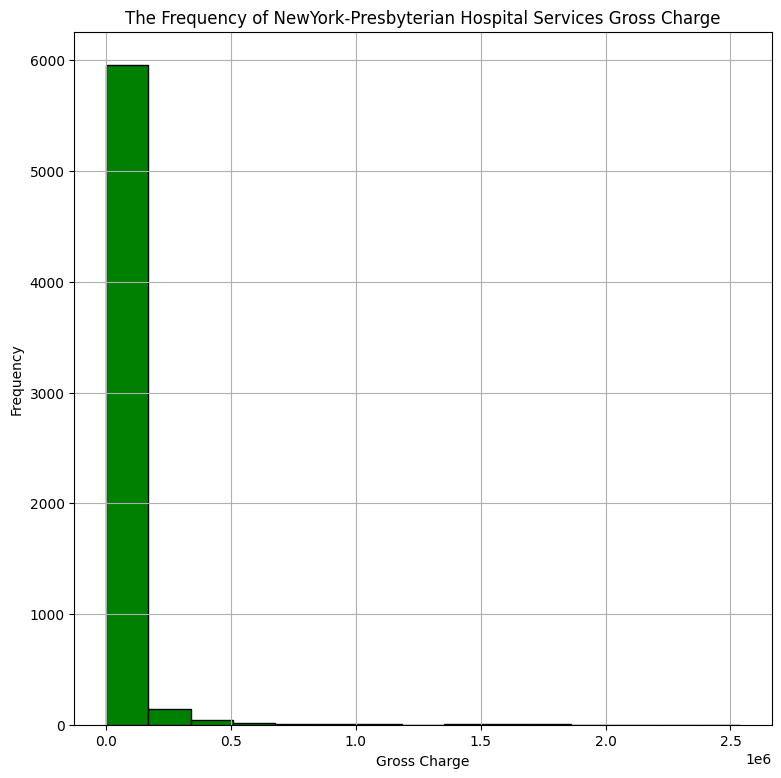

In [153]:
plt.figure(figsize=(9,9))
plt.hist(nyp['grosscharges'], bins=15, color='green', edgecolor='black')
plt.title('The Frequency of NewYork-Presbyterian Hospital Services Gross Charge')
plt.xlabel('Gross Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

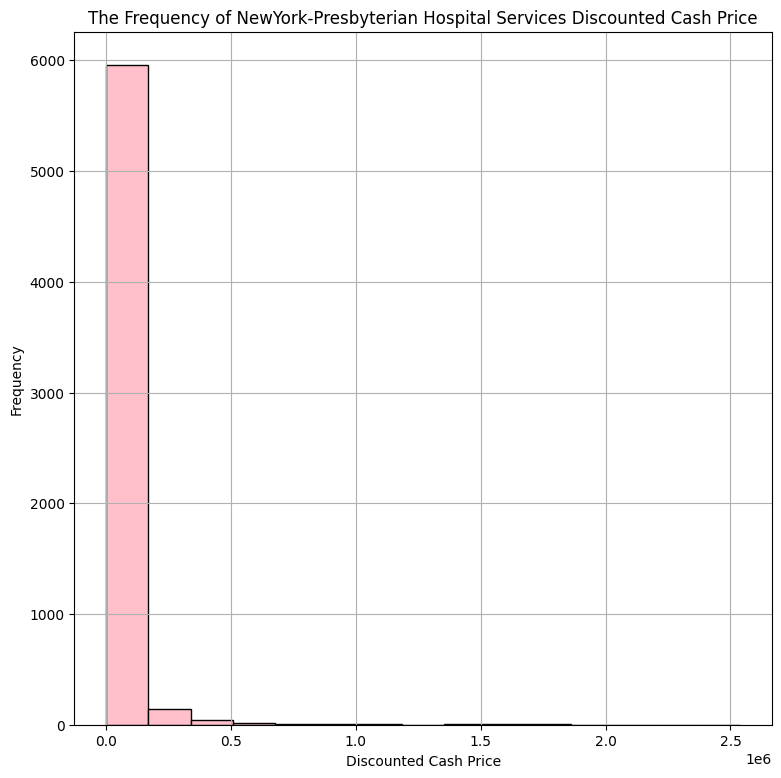

In [154]:
plt.figure(figsize=(9,9))
plt.hist(nyp['discountedcashprice'], bins=15, color='pink', edgecolor='black')
plt.title('The Frequency of NewYork-Presbyterian Hospital Services Discounted Cash Price')
plt.xlabel('Discounted Cash Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  SQLite Database Operations

## Table Creation


In [155]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('health.db')
cursor = conn.cursor()

In [156]:

# Create the 'sb' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sb
    (
        [codecptdrg] INTEGER,
        [description] TEXT,
        [revcode] INTEGER,
        [inpatientoutpatient] TEXT,
        [grosscharges] REAL,
        [discountedcashprice] REAL
    )
''')

# Insert sample data into the 'sb' table
cursor.execute('''
    INSERT INTO sb
    VALUES
        (1, 'Consultation', 123, 'Inpatient', 1000.50, 800.25),
        (2, 'Surgery', 456, 'Outpatient', 2500.75, 2000.60),
        (3, 'MRI Scan', 789, 'Inpatient', 150.20, 120.15)
''')

# Commit the changes
conn.commit()

# Execute a query to fetch table names and print them
cursor.execute('''
    SELECT name
    FROM sqlite_master
    WHERE type= 'table'
''')

tables = cursor.fetchall()

for value in tables:
    print(value)


('sb',)


In [157]:
cursor.execute('''
  SELECT * FROM sb;
''')

print(cursor.fetchall())

[(1, 'Consultation', 123, 'Inpatient', 1000.5, 800.25), (2, 'Surgery', 456, 'Outpatient', 2500.75, 2000.6), (3, 'MRI Scan', 789, 'Inpatient', 150.2, 120.15), (1, 'Consultation', 123, 'Inpatient', 1000.5, 800.25), (2, 'Surgery', 456, 'Outpatient', 2500.75, 2000.6), (3, 'MRI Scan', 789, 'Inpatient', 150.2, 120.15)]


In [158]:
engine = create_engine('sqlite:///health.db')

In [159]:
sb = pd.read_sql("select * from sb;", conn)
sb

,codecptdrg,description,revcode,inpatientoutpatient,grosscharges,discountedcashprice
0,1,Consultation,123,Inpatient,1000.50,800.25
1,2,Surgery,456,Outpatient,2500.75,2000.60
2,3,MRI Scan,789,Inpatient,150.20,120.15
3,1,Consultation,123,Inpatient,1000.50,800.25
4,2,Surgery,456,Outpatient,2500.75,2000.60
5,3,MRI Scan,789,Inpatient,150.20,120.15


In [160]:
sb.to_sql('sb', conn, if_exists='replace', index=False)

# Close the connection
conn.close()